# Exploratory Data Analysis

In [134]:
import pandas as pd
import numpy as np
from heapq import nlargest

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata
import string
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Clean Data

In [94]:
data = pd.read_csv('../data/translated_podcasts.csv')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300669 entries, 0 to 300668
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   300668 non-null  object
 1   uuid         300667 non-null  object
 2   title        300667 non-null  object
 3   description  116354 non-null  object
 4   language     116344 non-null  object
 5   categories   116339 non-null  object
 6   author       116339 non-null  object
dtypes: object(7)
memory usage: 16.1+ MB


In [96]:
# Remove null values.
data.dropna(axis=0, inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116339 entries, 0 to 300668
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   116339 non-null  object
 1   uuid         116339 non-null  object
 2   title        116339 non-null  object
 3   description  116339 non-null  object
 4   language     116339 non-null  object
 5   categories   116339 non-null  object
 6   author       116339 non-null  object
dtypes: object(7)
memory usage: 7.1+ MB


In [98]:
# Check for uuid uniqueness.
data['uuid'].nunique()

116339

In [99]:
# Drop extra index column.
data.drop('Unnamed: 0', axis=1, inplace=True)

In [100]:
data.head()

,uuid,title,description,language,categories,author
0,8d62d3880db2425b890b986e58aca393,"Ecommerce Conversations, by Practical Ecommerce",Listen in as the Practical Ecommerce editorial...,English,Technology,Practical Ecommerce
1,cbbefd691915468c90f87ab2f00473f9,Eat Sleep Code Podcast,On the show we’ll be talking to passionate peo...,English,Tech News | Technology,Telerik
2,73626ad1edb74dbb8112cd159bda86cf,SoundtrackAlley,A podcast about soundtracks and movies from my...,English,Podcasting | Technology,Randy Andrews
3,0f50631ebad24cedb2fee80950f37a1a,The Tech M&A Podcast,The Tech M&A Podcast pulls from the best of th...,English,Business News | Technology | Tech News | Business,Timothy Goddard
4,69580e7b419045839ca07af06cf0d653,"The Tech Informist - For fans of Apple, Google...",The tech news show with two guys shooting the ...,English,Gadgets | Tech News | Technology,The Tech Informist


In [101]:
# Remove any hyperlinks hidden in the descriptions.
data['description'] = data['description'].str.replace('http\S+|www.\S+', '', case=False)

In [102]:
# List where each element is a string of the description.
descriptions = data['description'].to_list()
descriptions[0]

'Listen in as the Practical Ecommerce editorial staff interviews interesting personalities in the ecommerce space.'

In [103]:
# List where each element is a string of the category.
categories = data['categories'].to_list()
categories[0]

'Technology'

In [104]:
# Create remove_accents function.
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

In [105]:
# Create clean_cat function.
def clean_cat(docs):
    # Make all words in documents lowercase.
    low_docs = [doc.lower() for doc in docs]
    # Remove all accents from documents.
    acc_docs = [remove_accents(doc) for doc in low_docs]
    # Tokenize each document.
    tokens = [word_tokenize(doc) for doc in acc_docs]
    # Remove stopwords and punctuation.
    stopwords_ = set(stopwords.words('english'))
    punctuation_ = set(string.punctuation)
    docs = [[word for word in token if word not in stopwords_ and word not in punctuation_] for token in tokens]
    # Apply Snowball Stemmer.
    ## snowball = SnowballStemmer('english')
    ## snowball_tokens = [list(map(snowball.stem, token)) for token in tokens]
    # Join tokens in each document.
    token_docs = [' '.join(tokens) for tokens in docs]
    return token_docs

In [106]:
categories = clean_cat(categories)

In [107]:
categories[0]

'technology'

## Create Feature Matrix for Categories

In [108]:
# Vectorize categories.
cv_categories = CountVectorizer()
X_categories = cv_categories.fit_transform(categories)

In [109]:
X_categories.shape

(116339, 83)

In [110]:
# Change X_categories into a dataframe.
X_categories = X_categories.toarray()
feature_names = cv_categories.get_feature_names()
categories_df = pd.DataFrame(X_categories, index=data['title'], columns=feature_names)
categories_df.shape

(116339, 83)

In [111]:
categories_df.head()

,12,alternative,amateur,arts,automotive,aviation,beauty,buddhism,business,careers,...,spirituality,sports,tech,technology,to,training,travel,tv,video,visual
title,,,,,,,,,,,,,,,,,,,,,
"Ecommerce Conversations, by Practical Ecommerce",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Eat Sleep Code Podcast,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
SoundtrackAlley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
The Tech M&A Podcast,0,0,0,0,0,0,0,0,2,0,...,0,0,1,1,0,0,0,0,0,0
"The Tech Informist - For fans of Apple, Google, Microsoft & other technology",0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## Plot

In [73]:
stopwords = set(STOPWORDS)
long_string = ' '.join(descriptions)

In [74]:
# Create word cloud variable.
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, colormap='tab10', min_font_size = 10).generate(long_string)

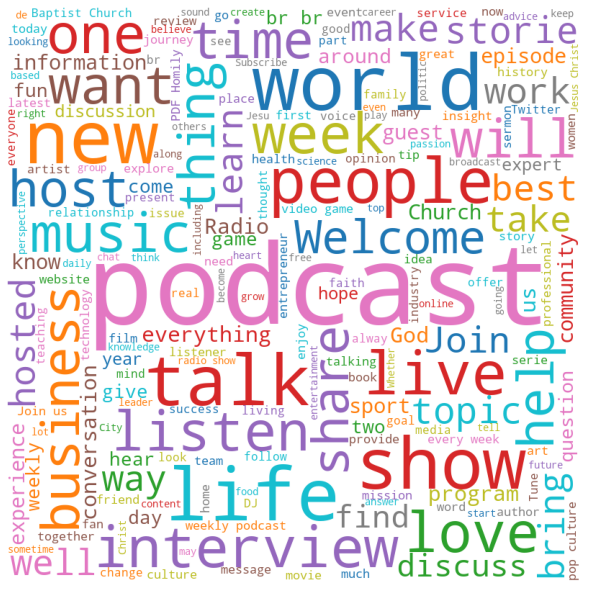

In [75]:
# Plot word cloud.
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# plt.savefig('../imgs/word-cloud.png')
plt.show()

In [130]:
# Calculate the proportions of each category.
cat_totals = np.sum(categories_df, axis=0)
n = categories_df.shape[0]

cat_proportions = cat_totals/n
cat_dict = cat_proportions.to_dict()

In [131]:
# Set threshold for categories with more than 5%.
thresh_dict = dict()
for key, val in cat_dict.items():
    if val > 0.05:
        thresh_dict[key] = val

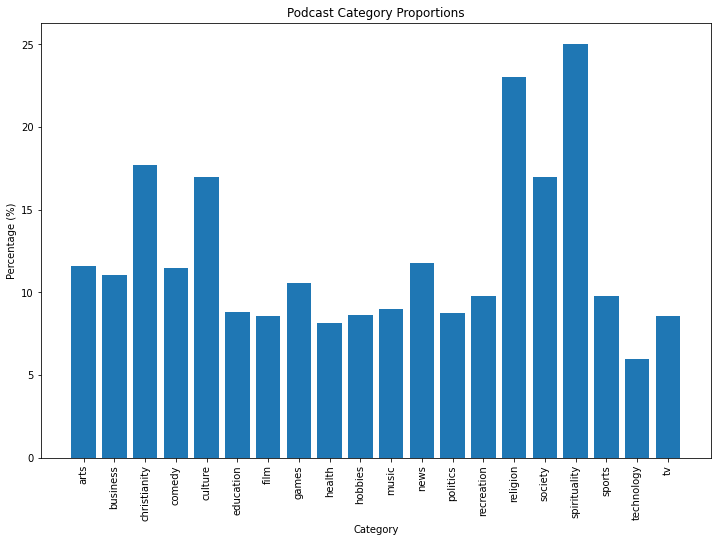

In [132]:
# Plot the proportions of each category.
x = np.array(list(thresh_dict.values()))*100
labels = thresh_dict.keys()

plt.figure(figsize = (12, 8))
plt.bar(labels, height=x)
plt.xticks(range(len(x)), labels, rotation='vertical')
plt.title('Podcast Category Proportions')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')

# plt.savefig('../imgs/cat-proportions.png')
plt.show()

In [136]:
# Top 5 categories.
nlargest(5, cat_dict, key = cat_dict.get)

['spirituality', 'religion', 'christianity', 'culture', 'society']